Return an SVG from d3-cloud rendering?



In [ ]:
var execSync = require('child_process').execSync;
try {
    require.resolve('d3-node');
} catch (e) {
    execSync('npm install "d3-node');
}

var D3Node = require('d3-node');

var margin = {top: 20, right: 20, bottom: 30, left: 50},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

function drawD3Cloud(wordCount) {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;
    var fill = d3.scaleOrdinal(d3.schemeCategory20);
    
    d3n.createSVG(width + margin.left + margin.right,
                        height + margin.top + margin.bottom)
        .append("g")
        .attr("transform",
              "translate(" + (margin.left + width / 2) + "," + (margin.top + height / 2) + ")")
        .selectAll("text")
        .data(wordCount)
        .enter().append("text")
        .style("font-size", function(d) { return d.size + "px"; })
        .style("font-family", "Impact")
        .style("fill", function(d, i) { return fill(i); })
        .attr("text-anchor", "middle")
        .attr("transform", function(d) {
             return "translate(" + [d.x, d.y] + ")rotate(" + d.rotate + ")";
        })
        .text(function(d) { return d.text; });
    
    return d3n.svgString();
};
drawD3Cloud;


Create a word-cloud from text and size values?



In [ ]:
var execSync = require('child_process').execSync;
try {
    require.resolve('d3-cloud');
    require.resolve('canvas');
} catch (e) {
    execSync('npm install "github:gulpjs/gulp.git#4.0" gulp-tap d3-node d3-cloud canvas');
}

var cloud = require('d3-cloud');
var Canvas = require("canvas");

var d3CloudToSVG = (wordCount) => {
    return new Promise(resolve => {
        cloud()
            .canvas(function() { return new Canvas(1, 1); })
            .size([width, height])
            .words(wordCount)
            .padding(0)
            .rotate(function() { return ~~(Math.random() * 120) - 60; })
            .font("Impact")
            .fontSize(function(d) { return d.size; })
            .on("end", function (wordCount) {
                resolve(drawD3Cloud(wordCount));
            })
            .start();
    });
};
d3CloudToSVG;


Display a long tree?


In [191]:
// source: https://github.com/rangle/augury/blob/dev/src/frontend/components/router-tree/router-tree.ts
var D3Node = require('d3-node');

var margin = {top: 25, right: 150, bottom: 25, left: 150},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

var d3TreeToSVG = (nodeTree, edges) => {
    var d3n = new D3Node(); // initializes D3 with container element 
    var d3 = d3n.d3;
    var tree = d3.tree().nodeSize([25, 150]);
    
    var fill = d3.scaleOrdinal(d3.schemeCategory20);
    
    var svg = d3n.createSVG(width + margin.left + margin.right,
                           height + margin.top + margin.bottom)
    var g = svg.append("g");

    // Compute the new tree layout.
    var d3Draw = (resolve) => {
        var x = d3.scaleLinear().range([0, height]);
        var y = d3.scaleLinear().range([0, width]);

        x.domain([d3.min(nodes, function(d) { return d.x; }), d3.max(nodes, function(d) { return d.x; })]);
        y.domain([d3.min(nodes, function(d) { return d.y; }), d3.max(nodes, function(d) { return d.y; })]);

        g.selectAll('.link')
          .data(links)
          .enter().append('path')
            .attr('class', 'link')
            .attr('d', d => `
                M${y(d.y)},${x(d.x)}
                C${y((d.y + d.parent.y) / 2)},
                  ${x(d.x)} ${y((d.y + d.parent.y) / 2)},
                  ${x(d.parent.x)} ${y(d.parent.y)},
                  ${x(d.parent.x)}`);

        // Declare the nodes
        var node = g.selectAll('g.node')
          .data(nodes)
          .enter().append('g')
          .attr('class', 'node')
          .style("fill", function(d, i) { return fill(i); })
          .attr('transform', d => `translate(${y(d.y)},${x(d.x)})`);

        node.append('circle')
          .attr('class', d => (d.data).isAux ? 'node-aux-route' : 'node-route')
          .attr('r', 6);

        node.append('text')
          .attr('x', (d) => d.children ? -13 : 13)
          .attr('dy', '.35em')
          .attr('text-anchor', (d) => d.children ? 'end' : 'start')
          .text(d => (d.data).name)
          .attr('class', 'monospace');

        // reset transform
        g.attr('transform', 'translate(0, 0)');

        g.attr("transform",
            "translate(" + (margin.left) + "," + (margin.top) + ")")

        return d3n.svgString();
    }

    if(typeof edges != 'undefined') {
        
        var nodeMap = {};
        nodeTree.forEach(function(x) {
            if(typeof x.size == 'undefined') {
                x.size = 1;
            }
            x.data = x;
            nodeMap[x.name] = x;
        });

        var links = edges.map(function(x) {
            if(typeof nodeMap[x.source].children == 'undefined') {
                nodeMap[x.source].children = [];
            }
            nodeMap[x.source].children.push(nodeMap[x.target]);
            return { parent: nodeMap[x.target], source: nodeMap[x.source], target: nodeMap[x.target] };
        });
        
        var nodes = nodeTree;
        var root = nodeTree.filter(d => d.name=='@angular/core')[0];
        /*
        // show a treemap
        var nodes = nodeTree.filter(d => d.name=='@angular/core')[0]; // = nodeTree.filter(n => n.name == '@angular/core');
        var treemap = d3.treemap()
            .tile(d3.treemapResquarify)
            .size([width, height])
            .round(true)
            .paddingInner(1);

        var nodes = treemap(d3.hierarchy(nodes)
            .eachBefore(function(d) { d.data.id = (d.parent ? d.parent.data.id + "." : "") + d.data.name; })
            .sum(d => d.size)
            .sort(function(a, b) { return b.height - a.height || b.value - a.value; }))
        .leaves();
        
        nodes.forEach(l => {
            l.x = l.x0;
            l.y = l.y0;
        });
        return Promise.resolve(d3Draw());
        */
        // display sunburst with lines between
        var radius = Math.min(width, height) / 2

        var x = d3.scaleLinear()
            .range([0, 2 * Math.PI]);

        var y = d3.scaleSqrt()
            .range([0, radius]);

       
        var partition = d3.partition()
        var root = d3.hierarchy(root, d => d.children).sum(function(d) { return d.size; });;

        var arc = d3.arc()
            .startAngle(function(d) { return Math.max(0, Math.min(2 * Math.PI, x(d.x0))); })
            .endAngle(function(d) { return Math.max(0, Math.min(2 * Math.PI, x(d.x1))); })
            .innerRadius(function(d) { return Math.max(0, y(d.y0)); })
            .outerRadius(function(d) { return Math.max(0, y(d.y1)); });

        // Interpolate the arcs in data space.
        function arcTween(a) {
          var i = d3.interpolate({x: a.x0, dx: a.dx0}, a);
          return function(t) {
            var b = i(t);
            a.x0 = b.x;
            a.dx0 = b.dx;
            return arc(b);
          };
        }
        
        var path = g.selectAll("path")
            .data(partition(root).descendants())
            .enter().append("path")
//            .attr("display", function(d) { return d.depth ? null : "none"; }) // hide inner ring
            .attr("d", arc)
            .style("stroke", "#fff")
            .style("fill", function(d, i) { return fill(i); })
            .style("fill-rule", "evenodd")
        
        g.selectAll("text")
            .data(partition(root).descendants())
            .enter().append('text')
            .attr('dy', function(d) { return (Math.max(0, y(d.y1)) - Math.max(0, y(d.y0))) / 2; })
            .attr('x', (d) => d.children ? -13 : 13)
            //.attr('dy', '.35em')
            .attr('text-anchor', (d) => d.children ? 'end' : 'start')
            .text(d => (d.data).name)
            .attr('class', 'monospace');

        /*
        path
            .data(partition.value(d => d.data.size).nodes)
            .attrTween("d", arcTween);
*/

        // reset transform
        g.attr('transform', 'translate(0, 0)');

        g.attr("transform",
            "translate(" + (margin.left + width / 2) + "," + (margin.top + height / 2) + ")")

        return Promise.resolve(d3n.svgString());
        /*
        return new Promise(resolve => {
            var ticks = 0;
            var simulation;
            simulation = d3.forceSimulation()
                .force('charge', d3.forceManyBody().strength(-20)) 
                .force('center', d3.forceCenter(height / 2, width / 2))
                .nodes(nodes)
                .on('tick', () => {
                    links.forEach(l => {
                        Object.assign(l, l.source);
                    });
                    ticks++;
                    if(ticks == 150) {
                        simulation.stop();
                        resolve(d3Draw())
                    }
                })
                .force('link', d3.forceLink(links)
                       .id(link => link.name)
                      // .strength(link => link.size)
                      )
                .force("y", d3.forceY(0))
                .force("x", d3.forceX(0))
                .restart();
        });
        */
    } else {

        /*
        force
            .nodes(nodes.descendants())
            .links(links)
            .start()
            .tick();
            */
        var root = {
          name: 'root',
          children: nodeTree,
          hash: null,
          path: null,
          specificity: null,
          handler: null,
          data: {},
          isAux: false,
        };

        var nodes = tree(d3.hierarchy(
            (root.children.length === 0 || root.children.length > 1) ? root : root.children[0], d => d.children))
            .descendants();
        var links = nodes.slice(1);
        
        return Promise.resolve(d3Draw());
    }
    
};
d3TreeToSVG;


[Function: d3TreeToSVG]

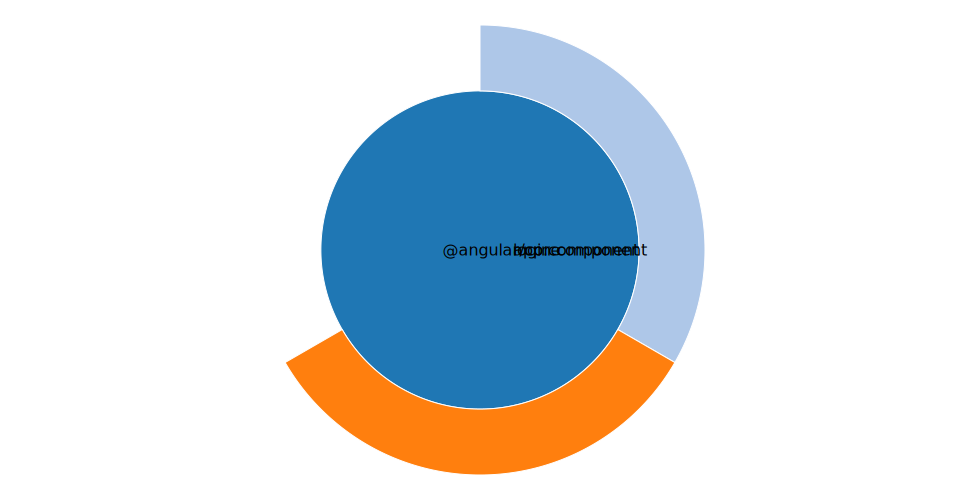

In [192]:
$$.async()
/*
d3TreeToSVG([
    {
        name: '@angular/router',
        children: [
            {
                name: 'app.component'
            },
            {
                name: 'login.component'
            }
        ]
    }
])
*/

d3TreeToSVG([
    {
        name: '@angular/core',
    },
    {
        name: 'app.component'
    },
    {
        name: 'login.component'
    }
], [
    {
        source: '@angular/core',
        target: 'app.component'
    },
    {
        source: '@angular/core',
        target: 'login.component'
    }
    
])
.then(svg => $$.svg(svg))
.catch(e => $$.sendError(e));

